<a href="https://colab.research.google.com/github/ll-cooool-j/DS-Assignment/blob/main/Copy_of_arima_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


            Confirmed  Deaths  Recovered  Infected
Date                                              
2020-07-01   10675596  541738    5468425   4665433
2020-07-02   10885548  547161    5753359   4585028
2020-07-03   11086923  552455    5863247   4671221
2020-07-04   11280744  557248    6059007   4664489
2020-07-05   11464726  561077    6178370   4725279


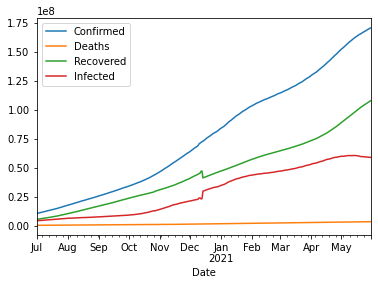

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = read_csv('/content/Global.csv', header=0, parse_dates=[0], index_col=0)
print(series.head())
series.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


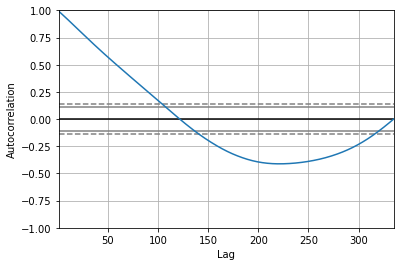

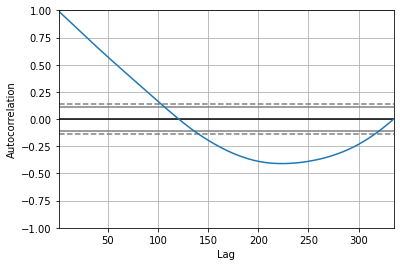

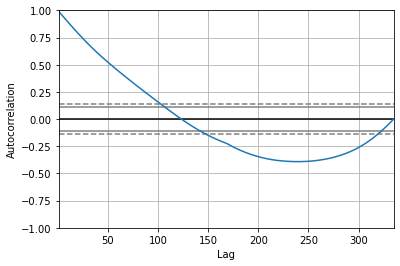

In [4]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
series = read_csv('/content/Global.csv', header=0, parse_dates=[0], index_col=0)
autocorrelation_plot(series['Confirmed'])
pyplot.show()

autocorrelation_plot(series['Deaths'])
pyplot.show()

autocorrelation_plot(series['Recovered'])
pyplot.show()

1/ This code below print the summary of the fit model

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

2/ This aslo help us get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

3/ Finally, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:             D.Infected   No. Observations:                  334
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4751.505
Method:                       css-mle   S.D. of innovations         364690.577
Date:                Wed, 30 Jun 2021   AIC                           9517.010
Time:                        14:42:32   BIC                           9543.688
Sample:                    07-02-2020   HQIC                          9527.647
                         - 05-31-2021                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.624e+05   3.07e+04      5.296      0.000    1.02e+05    2.23e+05
ar.L1.D.Infected     0.0822      0.055      1.506      0.133      -0.025       0.189
ar.L2.D.Infected    -0.0661 

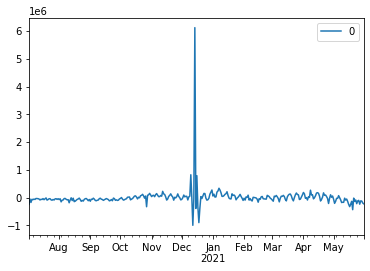

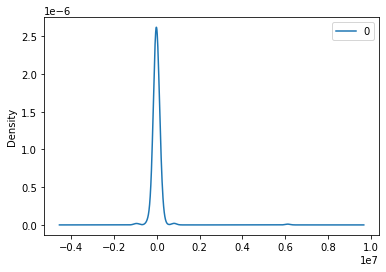

                  0
count  3.340000e+02
mean  -9.310730e+02
std    3.652593e+05
min   -9.989662e+05
25%   -8.033959e+04
50%   -3.134835e+04
75%    5.069495e+04
max    6.121057e+06


In [5]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('/content/Global.csv', header=0, index_col=0)
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# fit model
model = ARIMA(series.iloc[:,3:4], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Last but not least, we use ARIMA model to forecast the future time steps

Below is an example of a rolling forecast with the ARIMA model in Python.

It also compares the predicted value and expected value

In [59]:
f = read_csv('/content/Global.csv',header=0, index_col=0)
f.head()

,Confirmed,Deaths,Recovered,Infected
Date,,,,
1-Jul-20,10675596,541738,5468425,4665433
2-Jul-20,10885548,547161,5753359,4585028
3-Jul-20,11086923,552455,5863247,4671221
4-Jul-20,11280744,557248,6059007,4664489
5-Jul-20,11464726,561077,6178370,4725279


In [61]:
d=f.drop(columns=['Confirmed', 'Deaths', 'Recovered'])

In [66]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
# load dataset
idx = pd.date_range("2020-07-01", periods=335)
d.index = idx.to_period()
# split into train and test sets
A = d.values
print(pd.to_numpy())
size = int(len(A)/5*4)
train = A[np.where(A[:]<size)[0]]
test = A[size:len(A)]
print(train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: ignored

In [53]:
import numpy as np
a = np.array([266,45,7575,0,5445,44])
print(a[np.where((a[:] > 0) & (a[:] < 100))[0]])



[45 44]


In [ ]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(train, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('/content/Global.csv', header=0, index_col=0)
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# split into train and test sets
X =
y =
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [16]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
print(series)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
print(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64
[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3
 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]
[266.0, 145.9, 183.1, 119.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
